## LELEC2870 - Machine Learning Project
### Heart Failure Prediction in Smurf Society
---

# Data Preprocessing and Model Development

---
---

## Part 1 : Dataset Preparation

### Import necessary libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression as mutual_info
from sklearn.feature_selection import SequentialFeatureSelector

import random
import scipy.io

import warnings
warnings.filterwarnings('ignore')


### Load the data

In [10]:
X_train = pd.read_csv('data/data_labeled/X_train.csv')
X_test = pd.read_csv('data/data_labeled/X_test.csv')

# y CSV files don't have headers, so we need to specify header=None and provide column names
y_train = pd.read_csv('data/data_labeled/y_train.csv', header=None, names=['heart_failure_risk'])
y_test = pd.read_csv('data/data_labeled/y_test.csv', header=None, names=['heart_failure_risk'])

# Explore the data
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   blood pressure     1000 non-null   float64
 2   calcium            1000 non-null   float64
 3   cholesterol        1000 non-null   float64
 4   hemoglobin         1000 non-null   float64
 5   height             1000 non-null   float64
 6   potassium          1000 non-null   float64
 7   profession         1000 non-null   object 
 8   sarsaparilla       1000 non-null   object 
 9   smurfberry liquor  1000 non-null   object 
 10  smurfin donuts     1000 non-null   object 
 11  vitamin D          1000 non-null   float64
 12  weight             1000 non-null   float64
 13  img_filename       1000 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 109.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 en

### delete missing values

In [11]:
X_train = X_train.dropna()

# print length of X_train
print(len(X_train))


1000


There doesn't seem to be any missing values in the data

In [12]:
# delete missing values in y_train
y_train = y_train.dropna()

# print length of y_train
print(len(y_train))

1000


There doesn't seem to be any missing values in the data

### We can drop the img_filename column

In [13]:
X_train = X_train.drop(columns=['img_filename'])
X_test = X_test.drop(columns=['img_filename'])


### print all the possible values for the object columns


In [14]:
print(X_train['profession'].unique())
print(X_train['sarsaparilla'].unique())
print(X_train['smurfberry liquor'].unique())
print(X_train['smurfin donuts'].unique())


['food production' 'services' 'manufacturing' 'craftsmanship'
 'administration and governance' 'resource extraction']
['High' 'Moderate' 'Very low' 'Low' 'Very high']
['High' 'Moderate' 'Very high' 'Low' 'Very low']
['Very high' 'Very low' 'High' 'Low' 'Moderate']


### Transform profession column into a single column for each different profession with binary encoding


In [15]:
X_train = pd.get_dummies(X_train, columns=['profession'])
X_test = pd.get_dummies(X_test, columns=['profession'])

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       1000 non-null   int64  
 1   blood pressure                            1000 non-null   float64
 2   calcium                                   1000 non-null   float64
 3   cholesterol                               1000 non-null   float64
 4   hemoglobin                                1000 non-null   float64
 5   height                                    1000 non-null   float64
 6   potassium                                 1000 non-null   float64
 7   sarsaparilla                              1000 non-null   object 
 8   smurfberry liquor                         1000 non-null   object 
 9   smurfin donuts                            1000 non-null   object 
 10  vitamin D                            

### Map the columns sarsaparilla, smurfberry liquor, and smurfin donuts to values 0, 1, 2, 3, 4

In [16]:
# Strip whitespace from the three columns
X_train['sarsaparilla'] = X_train['sarsaparilla'].str.strip()
X_test['sarsaparilla'] = X_test['sarsaparilla'].str.strip()
X_train['smurfberry liquor'] = X_train['smurfberry liquor'].str.strip()
X_test['smurfberry liquor'] = X_test['smurfberry liquor'].str.strip()
X_train['smurfin donuts'] = X_train['smurfin donuts'].str.strip()
X_test['smurfin donuts'] = X_test['smurfin donuts'].str.strip()


X_train['sarsaparilla'] = X_train['sarsaparilla'].map({'Very high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Very low': 0})
X_test['sarsaparilla'] = X_test['sarsaparilla'].map({'Very high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Very low': 0})
X_train['smurfberry liquor'] = X_train['smurfberry liquor'].map({'Very high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Very low': 0})
X_test['smurfberry liquor'] = X_test['smurfberry liquor'].map({'Very high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Very low': 0})
X_train['smurfin donuts'] = X_train['smurfin donuts'].map({'Very high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Very low': 0})
X_test['smurfin donuts'] = X_test['smurfin donuts'].map({'Very high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Very low': 0})

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       1000 non-null   int64  
 1   blood pressure                            1000 non-null   float64
 2   calcium                                   1000 non-null   float64
 3   cholesterol                               1000 non-null   float64
 4   hemoglobin                                1000 non-null   float64
 5   height                                    1000 non-null   float64
 6   potassium                                 1000 non-null   float64
 7   sarsaparilla                              1000 non-null   int64  
 8   smurfberry liquor                         1000 non-null   int64  
 9   smurfin donuts                            1000 non-null   int64  
 10  vitamin D                            

### Standardization

In [17]:
# Standardize predictor variables
scX = StandardScaler()
scX.fit(X_train)
X_train = pd.DataFrame(scX.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scX.transform(X_test), columns=X_test.columns)

# Here we choose to standardize the target as well (not always useful)
scy = StandardScaler()
scy.fit(y_train)
y_train = pd.DataFrame(scy.transform(y_train), columns=y_train.columns)
y_test = pd.DataFrame(scy.transform(y_test), columns=y_test.columns)

---
## Part 2: Feature Selection

Since we still don't know which model we'll use, we'll stick to simple filter methods and won't do wrapper methods. Given that for the first part of this project, we'll use a linear model, embedded methods do not seem an option.

For the choice between correlation filter and mutual information filter, correlation seems a better choice. Mutual information captures non-linear relationships between features and the target, while linear models can only exploit linear relationships. Since we're using a linear model, we should focus on linear correlation between features and the target.

The filter that we will implement will select the top K most relevant features according to the correlation criterion (maximum relevance). However, within the selected subset, some features may be redundant, e.g., if they are highly correlated with one another. In this case, we may want to discard one of the redundant features. This follows the 'maximum relevance-minimum redundancy' principle.

The implementation will proceed in two steps:
1. **Correlation filter**: Compute the correlation between each feature and the target variable, then select the top K most correlated features.
2. **Redundancy removal**: Examine the correlation matrix (via heatmap) of the selected features and manually remove features that are highly correlated with each other, keeping only the most relevant one from each redundant pair.

### Correlation filter
Usually a model performs better when having more inputs, so I'll just discard the columns under a certain treshold instead of selecting top K features.

**Threshold choice: 0.2**

We select features with |correlation| ≥ 0.2, keeping 7 features (`blood pressure`, `cholesterol`, `weight`, `smurfin donuts`, `profession_administration and governance`, `age`, `sarsaparilla`) that show meaningful linear relationships with the target. This balances signal retention while filtering weak correlations (< 0.2) that would add noise without improving predictive power.

In [20]:
# correlation between each feature and the target
corr = X_train.corrwith(y_train["heart_failure_risk"])

# Sort correlations by absolute value
top_features = corr.abs()

selected_features = []

treshold = 0.2

for feature, correlation in top_features.items():
    print(f"{feature}: {abs(correlation):.3f}")
    if correlation >= treshold:
        print(f"  -> selected")
        selected_features.append(feature)

age: 0.221
  -> selected
blood pressure: 0.659
  -> selected
calcium: 0.015
cholesterol: 0.449
  -> selected
hemoglobin: 0.161
height: 0.111
potassium: 0.035
sarsaparilla: 0.200
  -> selected
smurfberry liquor: 0.076
smurfin donuts: 0.314
  -> selected
vitamin D: 0.018
weight: 0.418
  -> selected
profession_administration and governance: 0.239
  -> selected
profession_craftsmanship: 0.003
profession_food production: 0.164
profession_manufacturing: 0.004
profession_resource extraction: 0.114
profession_services: 0.140


### Heatmap

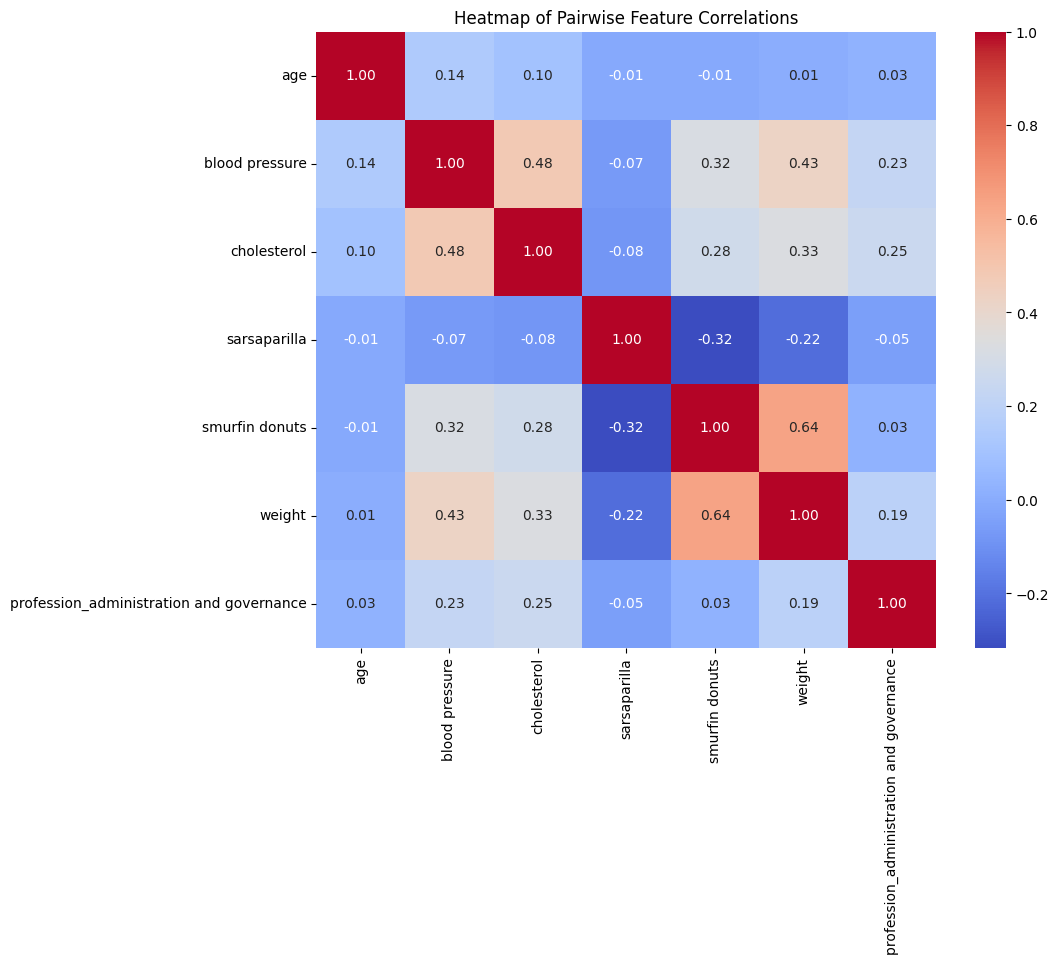

In [21]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Pairwise Feature Correlations")
plt.show()

Redundancy threshold: features with correlation > 0.7–0.8 are likely redundant; correlations around 0.4–0.6 indicate related but distinct features. We keep `cholesterol` & `blood pressure` (0.48), `weight` & `blood pressure` (0.43), and `sarsaparilla` & `smurfin donuts` (-0.32), as they capture complementary information. The `weight` & `smurfin donuts` pair (0.64) is borderline, but we still keep the 2.

---

## Part 3 : Linear Regression

With 1000 samples and 7 features, `X^T X` is a 7×7 matrix that is invertible (unless there is perfect multicollinearity), making the normal equation method computationally feasible and numerically stable. This is why we use `LinearRegression` (OLS) rather than Ridge/Lasso, since the small feature count relative to sample size avoids the numerical issues that regularization addresses.

### Evaluation Metric
In order to perform model selection, some metric(s) should be used in order to rank the performance
of the competing models. We will be using the RMSE criterion.

In [22]:
# Compute the Root Mean Square Error
def compute_rmse(predict, target):

    len_predict = len(predict)
    len_target = len(target)
    
    if len_predict != len_target:
        raise ValueError("predict and target must have the same length")
    
    rmse = np.sqrt(np.mean((predict - target) ** 2))
    
    
    return rmse

### Fitting and testing the model

In [25]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_selected, y_train.values.ravel())

print("Model coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"\nIntercept: {model.intercept_:.4f}")

# Predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

# Calculate metrics
train_rmse = compute_rmse(y_pred_train, y_train.values.ravel())
test_rmse = compute_rmse(y_pred_test, y_test.values.ravel())

print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"\nTraining Set:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"\nTest Set:")
print(f"  RMSE: {test_rmse:.4f}")

# Visualization (same as before)
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# axes[0].scatter(y_train.values.ravel(), y_pred_train, alpha=0.5, s=30)
# axes[0].plot([y_train.values.ravel().min(), y_train.values.ravel().max()], 
#              [y_train.values.ravel().min(), y_train.values.ravel().max()], 
#              'r--', lw=2, label='Perfect prediction')
# axes[0].set_xlabel('Actual Values', fontsize=12)
# axes[0].set_ylabel('Predicted Values', fontsize=12)
# axes[0].set_title(f'Training Set: Predictions vs Actual\nRMSE = {train_rmse:.4f}, R² = {train_r2:.4f}', fontsize=12)
# axes[0].legend()
# axes[0].grid(True, alpha=0.3)

# axes[1].scatter(y_test.values.ravel(), y_pred_test, alpha=0.5, s=30, color='orange')
# axes[1].plot([y_test.values.ravel().min(), y_test.values.ravel().max()], 
#              [y_test.values.ravel().min(), y_test.values.ravel().max()], 
#              'r--', lw=2, label='Perfect prediction')
# axes[1].set_xlabel('Actual Values', fontsize=12)
# axes[1].set_ylabel('Predicted Values', fontsize=12)
# axes[1].set_title(f'Test Set: Predictions vs Actual\nRMSE = {test_rmse:.4f}, R² = {test_r2:.4f}', fontsize=12)
# axes[1].legend()
# axes[1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

Model coefficients:
  age: 0.1327
  blood pressure: 0.5053
  cholesterol: 0.1264
  sarsaparilla: -0.1259
  smurfin donuts: -0.0012
  weight: 0.1222
  profession_administration and governance: 0.0594

Intercept: -0.0000

MODEL PERFORMANCE

Training Set:
  RMSE: 0.7007

Test Set:
  RMSE: 0.7245


**Interpretation** :
The linear regression model generalizes well, with a test RMSE of 0.7245, only slightly higher than the training RMSE (0.7007), indicating minimal overfitting. `blood pressure` is the strongest predictor (coefficient 0.5053), followed by `age`, `cholesterol`, and `weight`; `sarsaparilla` shows a protective effect, while `smurfin donuts` has negligible impact. Overall, the model captures meaningful linear relationships between the selected features and heart failure risk, with reasonable predictive accuracy on standardized data.

Why coefficients can differ from correlations: Correlation measures each feature’s relationship with the target in isolation, while regression coefficients measure each feature’s effect while controlling for all other features. When features are correlated (multicollinearity), they share predictive information, so a feature with a higher univariate correlation can have a smaller coefficient if its effect overlaps with other features (e.g., `weight` overlapping with `blood pressure`). Conversely, a feature with lower correlation can have a larger coefficient if it provides unique information not captured by others, as coefficients reflect each feature’s distinct contribution in the full model.





---

## Part 4 : Model selection

This is more relevant for deep networks, but not linear regression, so we won't need this for part 1